In [38]:
from functools import reduce
import numpy as np
from constants import *
from green_function import *
#import holoviews
from scipy import linalg as sla
import matplotlib as mp
plt.style.use('seaborn')		# Setting the plotting style
mp.rcParams['figure.figsize'] = (15, 10)  # Setting the size of the plots
import numpy.linalg as la 
from tqdm.notebook import tqdm


In [2]:
N_floquet_bands = 11
N_floquet_bands = 3

N = 20
J_z = np.diag(np.arange(-(N_floquet_bands-1)/2,1+(N_floquet_bands-1)/2))
Id_floquet_bands = np.eye(N_floquet_bands)
t = np.pi
mu = 0
mu2 = t 
T = 0.4
delta = 1*t
fourier_step_function = np.zeros((N_floquet_bands,N_floquet_bands),dtype=complex)
for i in range(N_floquet_bands):
    for j in range(N_floquet_bands):
        if i != j:
            fourier_step_function[i,j] = 1/(1j*np.pi*(i-j))
        else:
            fourier_step_function[i,j] = 0.5


In [3]:
def onsite(mu=mu, mu2 = mu2,period=T):
    return -mu * np.kron(s_z,Id_floquet_bands) - (2*np.pi/period) * np.kron(s_0,J_z) - (mu2-mu)* np.kron(s_z,fourier_step_function)


def hopping(t=t, delta=delta):
    return -t * np.kron(s_z,Id_floquet_bands) - 1j * delta * np.kron(s_y,Id_floquet_bands) 

In [4]:
def calculate_finite_spectrum(periods,mu=mu,mu2=mu2,t=t,delta=delta,N=N,d=d,N_floquet_bands=N_floquet_bands):
    energies = []
    for T in tqdm(periods):
        w = 2*np.pi/T
        h = Hamiltonian(d*N_floquet_bands,N,onsite(mu=mu,mu2=mu2,period=T),hopping(delta=delta,t=t)).lattice_hamiltonian()
        phases = la.eigvals(h)
        phases = np.sort(np.abs(phases))
        phases = np.delete(phases,np.where(phases >= w))
        ev = np.sort([(-1) ** n * val/w for n, val in enumerate(phases)])
        energies.append(ev)
        #energies.append(phases)
    return np.array(energies).real


period = T


def calculate_bands(momenta, mu=mu,mu2=mu2,t=t,delta=delta,N=N,d=d,N_floquet_bands=N_floquet_bands,period=period):
    energies = []
    for k in momenta:
        h = Hamiltonian(d*N_floquet_bands,N,onsite(mu=mu,mu2=mu2,period=period),hopping(delta=delta,t=t)).k_space_hamiltonian(k)
        phases = la.eigvalsh(h)
        #phases = np.sort(np.abs(phases))
        #ev = np.sort([(-1) ** n * val for n, val in enumerate(phases)])
        #energies.append(ev)
        energies.append(phases)
    return np.array(energies).real


def plot_spectrum(Hmat):
    evals,evecs = la.eigh(Hmat)
    evals = evals.real
    plt.scatter(np.arange(len(evals)),evals)
    plt.title('Energy Spectrum of Chain with {} Sites'.format(N))
    plt.show()



In [5]:
h = Hamiltonian(d*N_floquet_bands,N,onsite(),hopping())


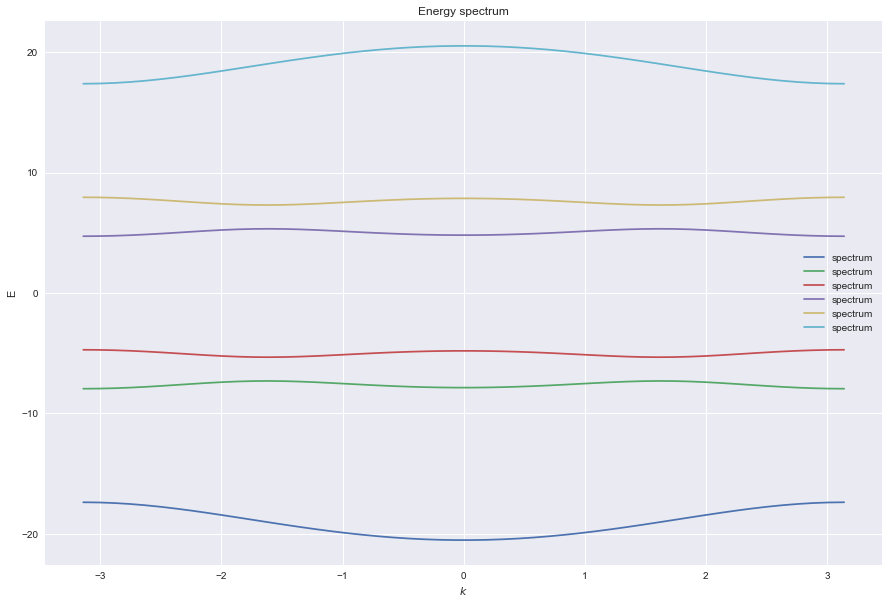

In [39]:
h.plot_spectrum()

In [7]:
h = Hamiltonian(d*N_floquet_bands,N,onsite(period=T),hopping())


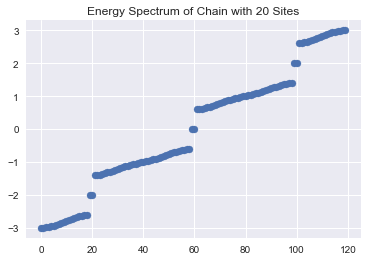

In [8]:
w = 2*np.pi/T
plot_spectrum(2*h.lattice_hamiltonian()/(w))

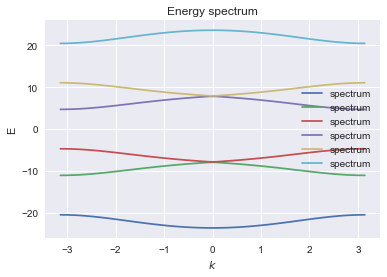

In [9]:
h.plot_spectrum()

In [10]:
periods = np.linspace(0.2 / t, 10 / t, 100)
momenta = np.linspace(-2*np.pi, 2*np.pi,100)


spectrum = np.array([calculate_bands(momenta, period=T) for T in tqdm(periods)])

  0%|          | 0/100 [00:00<?, ?it/s]

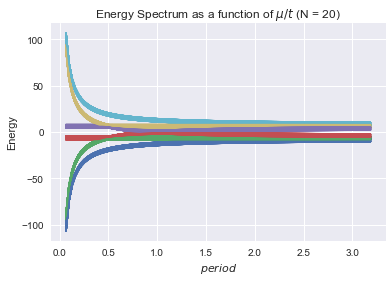

In [11]:
plt.title("Energy Spectrum as a function of $\mu/t$ (N = {})".format(N))
for i in range(100):
    plt.plot(periods,spectrum[:,i])
plt.ylabel('Energy')
plt.xlabel('$period$')
plt.show()
#plt.savefig('interesting bulk spectrum.png')

In [12]:
energies = calculate_finite_spectrum(periods)

  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\20101\AppData\Local\Temp\ipykernel_11628\1850988152.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(energies).real


In [13]:
print(energies.dtype)

object


ValueError: x and y must have same first dimension, but have shapes (100,) and (78,)

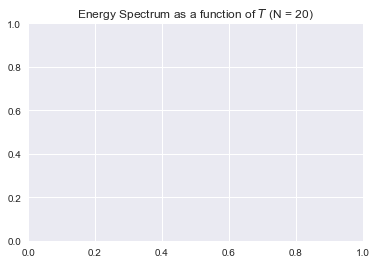

In [14]:
plt.title("Energy Spectrum as a function of $T$ (N = {})".format(N))
for i in range(d*N*N_floquet_bands):
    plt.plot(periods,energies[i])
plt.ylabel('Energy')
plt.xlabel('$period$')
plt.show()

In [15]:
print(fourier_step_function*np.pi)

[[ 1.57079633+0.j  -0.        +1.j  -0.        +0.5j]
 [ 0.        -1.j   1.57079633+0.j  -0.        +1.j ]
 [ 0.        -0.5j  0.        -1.j   1.57079633+0.j ]]


In [16]:
print(J_z)

[[-1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]]


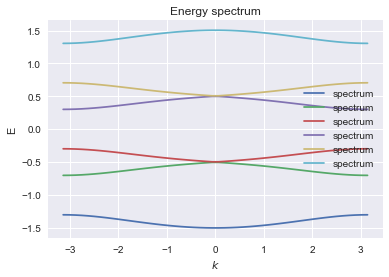

In [17]:
var_k = np.linspace(-np.pi,np.pi,50)
spectrum = []
for i in range(len(var_k)):
    unsorted_eval=la.eigvals(h.k_space_hamiltonian(k=var_k[i])/w)
    unsorted_eval = np.sort(np.abs(unsorted_eval))
    ev = np.sort([(-1) ** n * val for n, val in enumerate(unsorted_eval)])
    spectrum.append(ev)
plt.title("Energy spectrum")
plt.plot(var_k,spectrum, label='spectrum')
#plt.plot(var_mu/t,G_img-F_img,label = 'G_img-F_img')
plt.ylabel('E')
plt.xlabel('$k$')
plt.legend()
plt.show()

In [18]:
def onsite(mu=mu, mu2 = mu2,period=T):
    return -mu * np.kron(s_z,Id_floquet_bands) - (2*np.pi/period) * np.kron(s_0,J_z) - (mu2-mu)* np.kron(s_z,fourier_step_function)


def hopping(t=t, delta=delta, mu = mu):
    return -t * np.kron(s_z,Id_floquet_bands) - 1j * delta * np.kron(s_y,Id_floquet_bands) 

In [19]:
period = T
def kitaev_hamiltonian(k):
     h = -mu * np.kron(s_z,Id_floquet_bands) - (2*np.pi/period) * np.kron(s_0,J_z) - (mu2-mu)* np.kron(s_z,fourier_step_function)  -2 * t * np.kron(s_z,Id_floquet_bands) * np.cos(k) - 2 * delta * np.kron(s_y,Id_floquet_bands) * np.sin(k)
     return h 

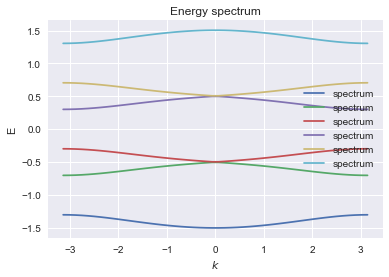

In [20]:
var_k = np.linspace(-np.pi,np.pi,50)
spectrum = []
for i in range(len(var_k)):
    unsorted_eval=la.eigvals(kitaev_hamiltonian(k=var_k[i])/w)
    unsorted_eval = np.sort(np.abs(unsorted_eval))
    ev = np.sort([(-1) ** n * val for n, val in enumerate(unsorted_eval)])
    spectrum.append(ev)
plt.title("Energy spectrum")
plt.plot(var_k,spectrum, label='spectrum')
#plt.plot(var_mu/t,G_img-F_img,label = 'G_img-F_img')
plt.ylabel('E')
plt.xlabel('$k$')
plt.legend()
plt.show()

In [21]:
N = 100

var_time = periods = np.linspace(0.2 / t, 5 / t, 100)

ldos100 = []

F_img = np.zeros([len(var_time)])
G_img = np.zeros([len(var_time)])
for i in tqdm(var_time):
    h = Hamiltonian(d*N_floquet_bands,N,onsite(period=i),hopping())
    h_f = h.lattice_hamiltonian()
    #G_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,0].imag])
    #F_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,1].imag])
    G = np.array(la.inv((1j*0.00001)*np.eye(len(h_f))-h_f))
    ldos100.append(-np.trace(G.imag))


  0%|          | 0/100 [00:00<?, ?it/s]

In [22]:
'''N = 200

var_time = periods = np.linspace(0.2 / t, 5 / t, 100)

ldos200 = []

F_img = np.zeros([len(var_time)])
G_img = np.zeros([len(var_time)])
for i in tqdm(var_time):
    h = Hamiltonian(d*N_floquet_bands,N,onsite(period=i),hopping())
    h_f = h.lattice_hamiltonian()
    #G_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,0].imag])
    #F_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,1].imag])
    G = np.array(la.inv((1j*0.00001)*np.eye(len(h_f))-h_f))
    ldos200.append(-np.trace(G.imag))'''


'N = 200\n\nvar_time = periods = np.linspace(0.2 / t, 5 / t, 100)\n\nldos200 = []\n\nF_img = np.zeros([len(var_time)])\nG_img = np.zeros([len(var_time)])\nfor i in tqdm(var_time):\n    h = Hamiltonian(d*N_floquet_bands,N,onsite(period=i),hopping())\n    h_f = h.lattice_hamiltonian()\n    #G_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,0].imag])\n    #F_img[i] = -1*np.array([la.inv(1j*0.001*np.eye(len(h_f))-h_f)[0,1].imag])\n    G = np.array(la.inv((1j*0.00001)*np.eye(len(h_f))-h_f))\n    ldos200.append(-np.trace(G.imag))'

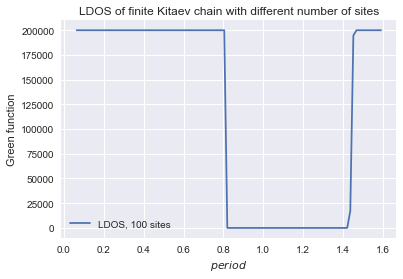

In [23]:
plt.title("LDOS of finite Kitaev chain with different number of sites")
plt.plot(var_time,ldos100, label='LDOS, 100 sites')
#plt.plot(var_time,ldos200, label='LDOS, 200 sites')
#plt.plot(var_time,ldos300, label='LDOS, 300 sites')
#plt.plot(var_time,ldos400, label='LDOS, 400 sites')
#plt.plot(var_time,ldos500, label='LDOS, 500 sites')

plt.ylabel('Green function')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [24]:
N = 100

var_T = np.linspace(0.2 / t, 5 / t, 101)
var_E = np.linspace(-1,1,101)
x, y = np.meshgrid(var_T, var_E)
var_ldos = np.zeros((len(var_T),len(var_E)))
for i in tqdm(range(len(var_T))):
    w = 2*np.pi/var_T[i]
    h = Hamiltonian(d*N_floquet_bands,N,onsite(period=var_T[i]),hopping())
    h_f = h.lattice_hamiltonian()/w
    for j in tqdm(range(len(var_E))):
        G = np.array(la.inv((var_E[j]+1j*0.00001)*np.eye(len(h_f))-h_f))
        var_ldos[j,i] = -np.trace(G.imag)





  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

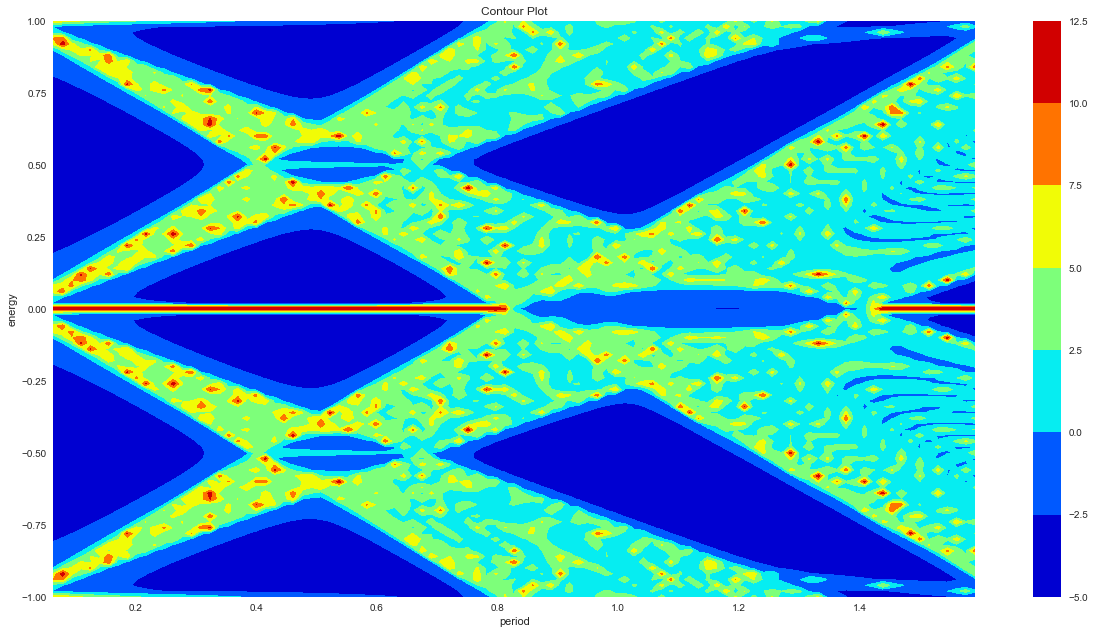

In [25]:
fig = plt.figure(figsize=(20,10))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
cp = plt.contourf(x, y, np.log(abs(var_ldos)),cmap='jet')
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel('period')
ax.set_ylabel('energy')
plt.show()

In [26]:
N = 100
#index = np.arange(0.5*N)
trace_cutoff = int(0.5*N)

chiral_operator = Hamiltonian(d,N,s_x,np.zeros((d,d))).lattice_hamiltonian()
var_T = np.linspace(0.2 / t, 5 / t, 100)
var_E = np.linspace(-2,2,100)
x, y = np.meshgrid(var_T, var_E)
var_f = []
var_f_0 = []
var_f_pi = []
var_evenf_0 = []
var_evenf_pi = []

for j in tqdm(range(len(var_T))):
    h = Hamiltonian(d*N_floquet_bands,N,onsite(period=var_T[j]),hopping())
    h_f = h.lattice_hamiltonian()

    G = np.array(la.inv((0.00000000001*1j)*np.eye(len(h_f))-h_f))
    var_f.append( G[0,1].imag)


    G_0_pos = np.array(la.inv(( 0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_neg = np.array(la.inv((-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_0_odd = (G_0_pos - G_0_neg)/2
    G_0_even = (G_0_pos + G_0_neg)/2
    var_f_0.append( G_0_odd[0,1].imag)
    var_evenf_0.append( G_0_even[0,1].imag)

    G_pi_pos = np.array(la.inv((1+0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_neg = np.array(la.inv((- 1-0.00000000001*1j)*np.eye(len(h_f))-h_f))
    G_pi_odd = (G_pi_pos - G_pi_neg)/2
    G_pi_even = (G_pi_pos + G_pi_neg)/2
    var_f_pi.append( G_pi_odd[0,1].imag)
    var_evenf_pi.append( G_pi_even[0,1].imag)





  0%|          | 0/100 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


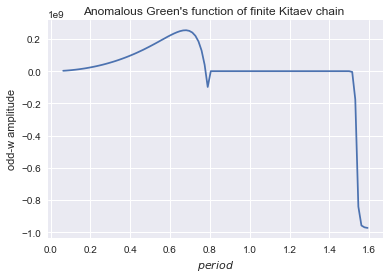

3.141592653589793


In [27]:
plt.title("Anomalous Green's function of finite Kitaev chain ")
plt.plot(var_T,var_f)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()
print(delta)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


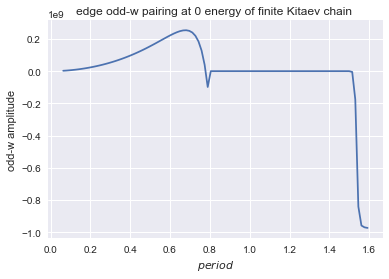

In [28]:

plt.title("edge odd-w pairing at 0 energy of finite Kitaev chain ")
plt.plot(var_T,var_f_0)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


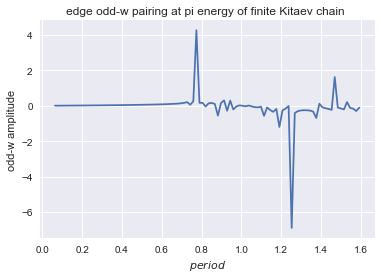

In [29]:
plt.title("edge odd-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,var_f_pi)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


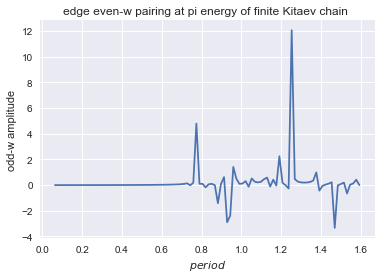

In [30]:
plt.title("edge even-w pairing at pi energy of finite Kitaev chain ")
plt.plot(var_T,var_evenf_pi)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


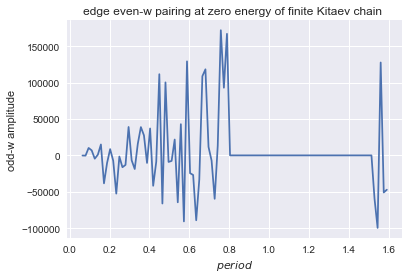

In [31]:
plt.title("edge even-w pairing at zero energy of finite Kitaev chain ")
plt.plot(var_T,var_evenf_0)


plt.ylabel('odd-w amplitude')
plt.xlabel('$period$')
#plt.yscale('log')
plt.legend()
plt.show()

In [32]:
N = 100
#index = np.arange(0.5*N)
trace_cutoff = int(0.5*N)
var_T = np.linspace(0.2 / t, 5 / t, 100)
var_E = np.linspace(-2,2,100)
x, y = np.meshgrid(var_T, var_E)
var_oddf = []
var_evenf = []
h = Hamiltonian(d*N_floquet_bands,N,onsite(period=0.5),hopping())
h_f = h.lattice_hamiltonian()

for j in tqdm(range(len(var_E))):


    #h_f = h_1.lattice_hamiltonian()
    G_0_pos = np.array(la.inv((var_E[j]*1j)*np.eye(len(h_f))-h_f))
    G_0_neg = np.array(la.inv((-var_E[j]*1j)*np.eye(len(h_f))-h_f))
    G_0_odd = (G_0_pos - G_0_neg)/2
    G_0_even = (G_0_pos + G_0_neg)/2
    var_oddf.append( G_0_odd[0,1].imag)
    var_evenf.append( G_0_even[0,1].imag)

    





  0%|          | 0/100 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


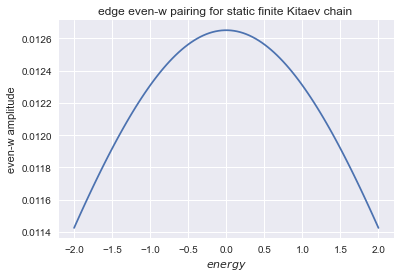

In [33]:
plt.title("edge even-w pairing for static finite Kitaev chain ")
plt.plot(var_E,var_evenf)


plt.ylabel('even-w amplitude')
plt.xlabel('$energy$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


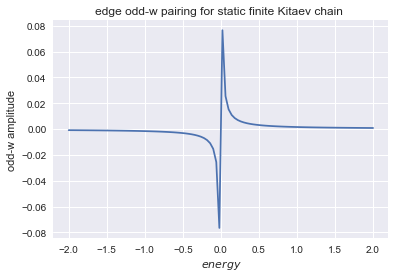

In [34]:
plt.title("edge odd-w pairing for static finite Kitaev chain ")
plt.plot(var_E,var_oddf)


plt.ylabel('odd-w amplitude')
plt.xlabel('$energy$')
#plt.yscale('log')
plt.legend()
plt.show()

In [35]:
N = 100
momenta = np.linspace(-np.pi,np.pi,1000)
trace_cutoff = int(0.5*N)

chiral_operator = s_x
var_T = np.linspace(0.2 / t, 5 / t, 100)
var_E = np.linspace(-4,4,101)
x, y = np.meshgrid(var_T, var_E)
f_bulk_odd = []
f_bulk_even = []
T = 0.5
w = 2*np.pi/T
h_f = [Hamiltonian(d*N_floquet_bands,N,onsite(period=T),hopping()).k_space_hamiltonian(k)/w for k in momenta ]
for j in range(len(var_E)):
    G_pos = [np.array(la.inv((var_E[j]*1j)*np.eye(len(h_f[k]))-h_f[k])) for k in range(len(h_f))]
    G_neg = [np.array(la.inv((-var_E[j]*1j)*np.eye(len(h_f[k]))-h_f[k])) for k in range(len(h_f))]
    G_odd = [(G_pos[k] - G_neg[k])/2 for k in range(len(h_f))]
    G_even = [(G_pos[k] + G_neg[k])/2 for k in range(len(h_f))]
    f_k_odd = [G_odd[k][0,1].imag for k in range(len(h_f))]
    f_k_even = [G_even[k][0,1].imag for k in range(len(h_f))]
    f_bulk_odd.append(sum(f_k_odd))
    f_bulk_even.append(sum(f_k_even))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


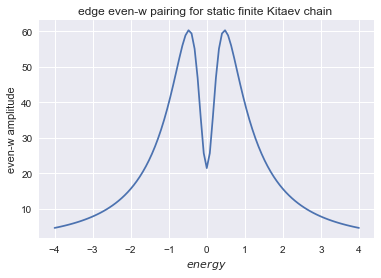

In [36]:
plt.title("edge even-w pairing for static finite Kitaev chain ")
plt.plot(var_E,f_bulk_even)


plt.ylabel('even-w amplitude')
plt.xlabel('$energy$')
#plt.yscale('log')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


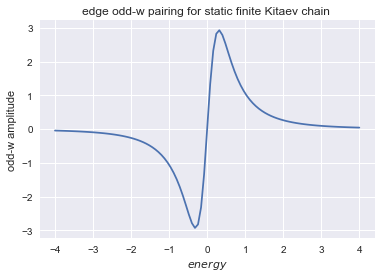

In [37]:
plt.title("edge odd-w pairing for static finite Kitaev chain ")
plt.plot(var_E,f_bulk_odd)


plt.ylabel('odd-w amplitude')
plt.xlabel('$energy$')
#plt.yscale('log')
plt.legend()
plt.show()